In [1]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,obama,trump
abject,0,1
able,1,3
abolish,0,1
abortion,0,1
abroad,1,1


In [2]:
# Find the top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'obama': [('thats', 35),
  ('people', 27),
  ('america', 27),
  ('just', 25),
  ('world', 24),
  ('american', 22),
  ('work', 22),
  ('new', 19),
  ('want', 19),
  ('make', 19),
  ('years', 18),
  ('change', 18),
  ('year', 17),
  ('economy', 16),
  ('weve', 15),
  ('americans', 15),
  ('need', 15),
  ('better', 15),
  ('dont', 14),
  ('way', 13),
  ('right', 13),
  ('like', 13),
  ('future', 12),
  ('country', 12),
  ('job', 11),
  ('security', 10),
  ('going', 10),
  ('im', 10),
  ('politics', 9),
  ('time', 9)],
 'trump': [('american', 33),
  ('new', 23),
  ('years', 21),
  ('states', 21),
  ('united', 21),
  ('tonight', 19),
  ('americans', 17),
  ('country', 17),
  ('america', 15),
  ('congress', 14),
  ('border', 13),
  ('decades', 12),
  ('women', 12),
  ('time', 11),
  ('come', 11),
  ('just', 11),
  ('year', 11),
  ('americas', 10),
  ('illegal', 10),
  ('jobs', 10),
  ('work', 10),
  ('nation', 10),
  ('administration', 9),
  ('people', 9),
  ('world', 9),
  ('did', 8),
  ('

In [3]:
# Print the top 15 words said by each comedian
for president, top_words in top_dict.items():
    print(president)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

obama
thats, people, america, just, world, american, work, new, want, make, years, change, year, economy
---
trump
american, new, years, states, united, tonight, americans, country, america, congress, border, decades, women, time
---


In [4]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each president
words = []
for president in data.columns:
    top = [word for (word, count) in top_dict[president]]
    for t in top:
        words.append(t)
        
words

['thats',
 'people',
 'america',
 'just',
 'world',
 'american',
 'work',
 'new',
 'want',
 'make',
 'years',
 'change',
 'year',
 'economy',
 'weve',
 'americans',
 'need',
 'better',
 'dont',
 'way',
 'right',
 'like',
 'future',
 'country',
 'job',
 'security',
 'going',
 'im',
 'politics',
 'time',
 'american',
 'new',
 'years',
 'states',
 'united',
 'tonight',
 'americans',
 'country',
 'america',
 'congress',
 'border',
 'decades',
 'women',
 'time',
 'come',
 'just',
 'year',
 'americas',
 'illegal',
 'jobs',
 'work',
 'nation',
 'administration',
 'people',
 'world',
 'did',
 'ago',
 'make',
 'know',
 'trade']

In [5]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('people', 2),
 ('america', 2),
 ('just', 2),
 ('world', 2),
 ('american', 2),
 ('work', 2),
 ('new', 2),
 ('make', 2),
 ('years', 2),
 ('year', 2),
 ('americans', 2),
 ('country', 2),
 ('time', 2),
 ('thats', 1),
 ('want', 1),
 ('change', 1),
 ('economy', 1),
 ('weve', 1),
 ('need', 1),
 ('better', 1),
 ('dont', 1),
 ('way', 1),
 ('right', 1),
 ('like', 1),
 ('future', 1),
 ('job', 1),
 ('security', 1),
 ('going', 1),
 ('im', 1),
 ('politics', 1),
 ('states', 1),
 ('united', 1),
 ('tonight', 1),
 ('congress', 1),
 ('border', 1),
 ('decades', 1),
 ('women', 1),
 ('come', 1),
 ('americas', 1),
 ('illegal', 1),
 ('jobs', 1),
 ('nation', 1),
 ('administration', 1),
 ('did', 1),
 ('ago', 1),
 ('know', 1),
 ('trade', 1)]

In [6]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

[]

In [7]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [8]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

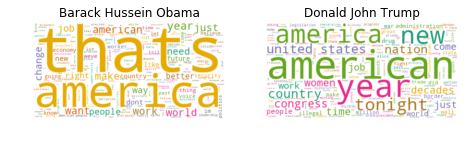

In [9]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['Barack Hussein Obama', 'Donald John Trump']

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

In [10]:
# Find the number of unique words that each president uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for president in data.columns:
    uniques = data[president].nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['president', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,president,unique_words
0,Barack Hussein Obama,1378
1,Donald John Trump,1393


In [12]:
# Calculate the words per minute of each president

# Find the total number of words that a president uses
total_list = []
for president in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)
    
# Comedy special run times from IMDB, in minutes
run_times = [61, 52]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,president,unique_words,total_words,run_times,words_per_minute
0,Barack Hussein Obama,1378,2535,61,41.557377
1,Donald John Trump,1393,2535,52,48.750000
